<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=2f35feaed561c060bc4194fe3aa2d6ee1c4d91ff139e2cf58e6c14c2dad3d199
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [2]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [66]:
fa = FactorAnalyzer(n_factors=2, rotation=None)

data_white_dropped = data_white.drop(columns=['quality'])
X = StandardScaler().fit_transform(data_white_dropped)
# Fit the factor analysis model
fa.fit(X)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=2, rotation=None, rotation_kwargs={},
            use_smc=True)


# Get factor loadings, eigenvalues, etc.
loadings = fa.loadings_

eigenvalues, _ = fa.get_eigenvalues()

loadings_df = pd.DataFrame(loadings,
                           index=data_white_dropped.columns,   # Set the row index to be the feature names
                           columns=["Factor 1", "Factor 2"])  # Name factors

# Display the DataFrame of factor loadings
print(loadings_df)



                      Factor 1  Factor 2
fixed acidity         0.252468 -0.643702
volatile acidity      0.010059  0.026082
citric acid           0.194009 -0.254270
residual sugar        0.708303  0.009011
chlorides             0.290711  0.001322
free sulfur dioxide   0.436203  0.263546
total sulfur dioxide  0.645256  0.250533
density               0.981522 -0.003171
pH                   -0.190984  0.554257
sulphates             0.057949  0.141974
alcohol              -0.721755 -0.040094


<Axes: >

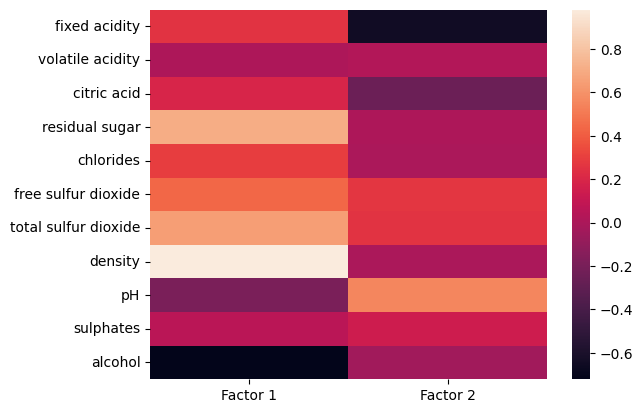

In [67]:
sns.heatmap(loadings_df)


In [54]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
communalities = loadings ** 2  # Square the factor loadings
communalities = communalities.sum(axis=1)  # Sum the squared loadings across factors (row-wise sum)

# Convert communalities into a DataFrame (optional for better readability)
communalities_df = pd.DataFrame(communalities, index=data_white_dropped.columns, columns=['Communality'])

communalities_df

,Communality
fixed acidity,0.478092
volatile acidity,0.000781
citric acid,0.102293
residual sugar,0.501774
chlorides,0.084514
free sulfur dioxide,0.259730
total sulfur dioxide,0.479122
density,0.963396
pH,0.343676
sulphates,0.023515


In [69]:
uniqueness = fa.get_uniquenesses()

# Get the factor loadings (this is the lambda matrix)
lambda_ = fa.loadings_

# Construct the psi (diagonal matrix of uniquenesses)
psi = np.diag(uniqueness)

# Get the correlation matrix (s)
s = np.corrcoef(np.transpose(data_white_dropped))

# Calculate the sigma matrix: sigma = lambda_.T * lambda_ + psi
# Since lambda_ is (n_variables, n_factors), we need to calculate lambda_ @ lambda_.T
sigma = np.matmul(lambda_, lambda_.T) + psi

# Calculate residuals: residuals = s - sigma
residuals = s - sigma

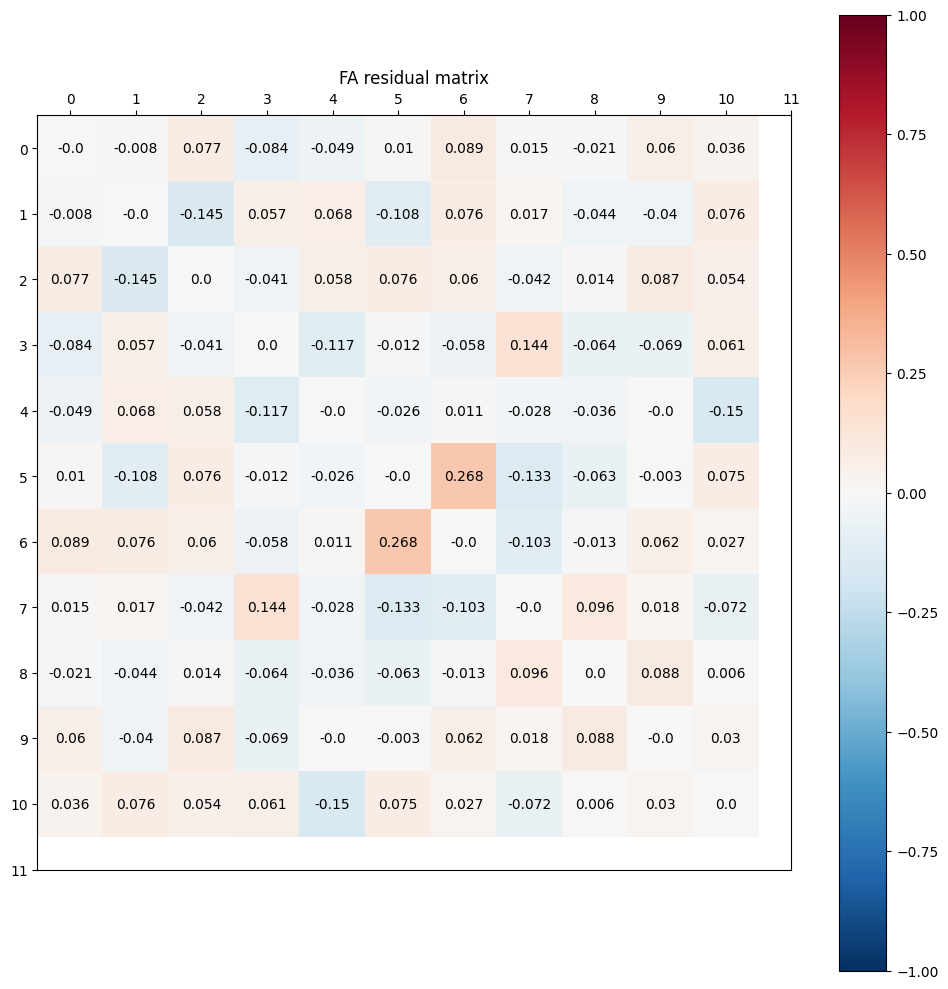

In [70]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_yticks(range(12))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

In [98]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_white, 2)
res_w = mod_w.fit()
res_w.rotate('quartimax')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                Factor analysis results
=======================================================================================================================================================
                                                Eigenvalues                                                                                            
-------------------------------------------------------------------------------------------------------------------------------------------------------
 fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density    pH   sulphates alcohol quality
-------------------------------------------------------------------------------------------------------------------------------------------------------
        2.9262           0.9299      0.5562         0.3833    0.2507              0.1225              -0.0321 -0.1160 -0.1867   -0.2754 -0.3212 -0.3812
-------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                       
-------------------------------------------------------------------------------------------------------------------------------------------------------
                                                Communality                                                                                            
-------------------------------------------------------------------------------------------------------------------------------------------------------
  fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density   pH   sulphates alcohol quality
-------------------------------------------------------------------------------------------------------------------------------------------------------
         0.4266           0.0010      0.0868         0.4690    0.0952              0.2628               0.4867  0.9542 0.3512    0.0275  0.5767  0.1183
-------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                       
-------------------------------------------------------------------------------------------------------------------------------------------------------
                                             Pre-rotated loadings                                                                                      
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                      factor 0                                                                                                                  factor 1
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fixed acidity                                                                                                                          -0.2521                                                                                                                    0.6025
volatile acidity                                                   

In [108]:
from statsmodels.multivariate.factor import Factor
mod_w = Factor(data_white_dropped, 3)
res_w = mod_w.fit()
res_w.rotate('quartimax')
res_w.summary()
res_w.get_loadings_frame(threshold=0.3)

,factor 0,factor 1,factor 2
density,-1.183752,0.033908,0.060404
residual sugar,-0.676747,0.049028,0.158978
alcohol,0.654851,-0.052868,-0.213611
chlorides,-0.239426,0.055482,0.129533
fixed acidity,-0.166678,0.741184,-0.025623
pH,0.121210,-0.544364,0.039564
citric acid,-0.092467,0.347148,0.132697
volatile acidity,-0.037221,-0.051985,-0.037120
total sulfur dioxide,-0.414463,0.004384,0.784824
free sulfur dioxide,-0.217450,-0.051173,0.662926


Three factors can be described as sweetness, sourness and roughness.

In [97]:
res_w.get_loadings_frame(threshold=0.3)

,factor 0,factor 1
density,-0.971596,0.101087
alcohol,0.758161,-0.061541
residual sugar,-0.682589,0.047718
total sulfur dioxide,-0.665326,-0.206576
free sulfur dioxide,-0.447316,-0.252798
quality,0.314542,-0.133693
chlorides,-0.303811,0.049324
fixed acidity,-0.187301,0.626759
pH,0.136339,-0.576177
citric acid,-0.161907,0.247933


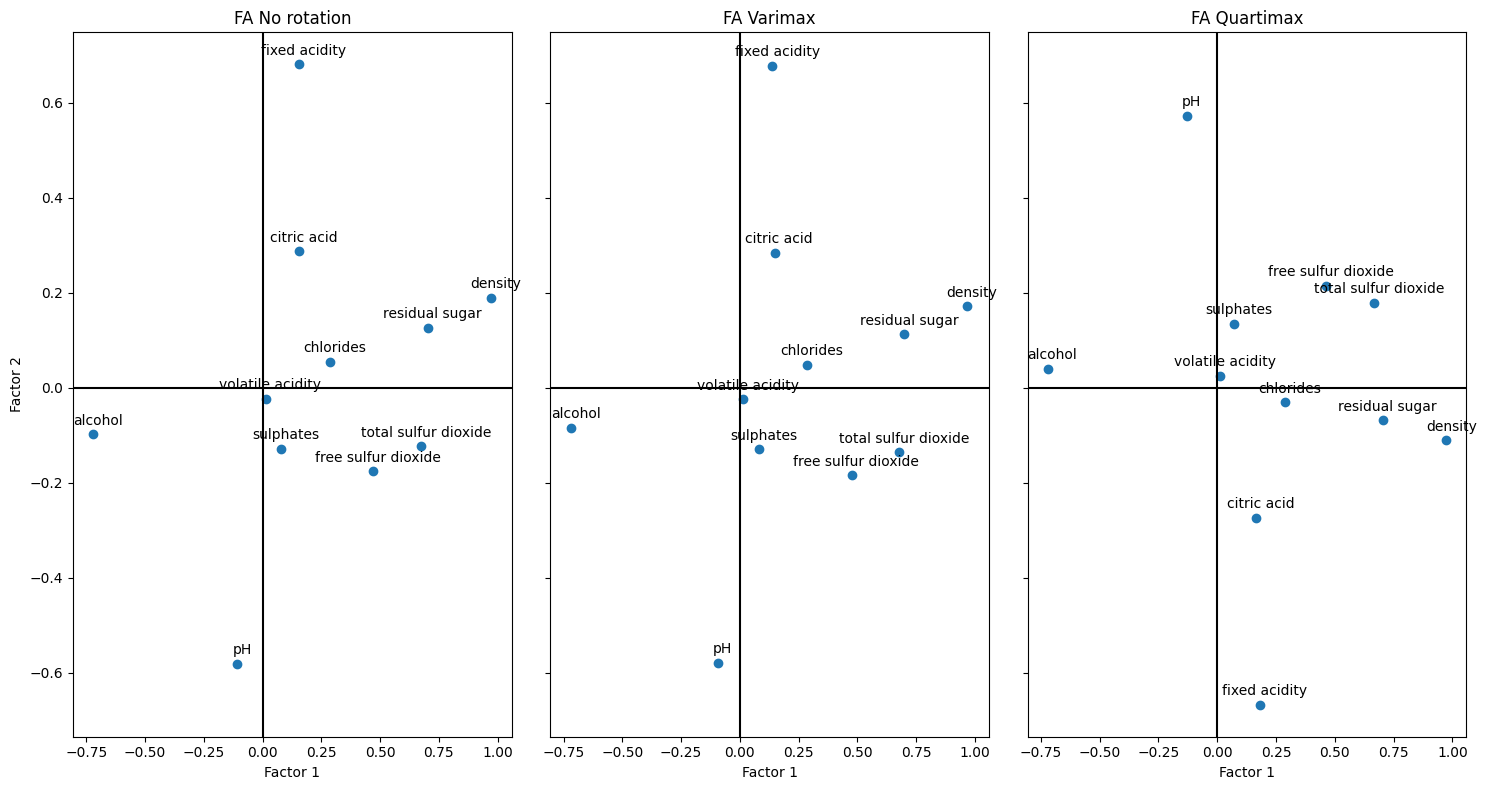

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Standardize the data (assuming data_white is your dataset)


# Define different factor analysis methods with rotations
methods = [
    ("FA No rotation", FactorAnalyzer(2)),
    ("FA Varimax", FactorAnalyzer(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(2, rotation="quartimax")),
]

# Create subplots with shared x and y axes
fig, axes = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)

for ax, (method_name, fa) in zip(axes, methods):
    # Fit the FactorAnalyzer model
    fa.fit(X)

    # Get the factor loadings (not components)
    loadings = fa.loadings_

    # Plot scatter of factor loadings for Factor 1 and Factor 2
    ax.scatter(loadings[:, 0], loadings[:, 1])

    # Draw lines for x=0 and y=0
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

    # Annotate the points with variable names
    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    # Set the title for each subplot
    ax.set_title(method_name)

    # Set labels
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 2")
    ax.set_xlabel("Factor 1")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Volatile acidity will be dropped due to the reason of having zero impact on the wine quality/taste.

In [96]:
data_white_dropped2 = data_white.drop(columns=['volatile acidity'])
X = StandardScaler().fit_transform(data_white_dropped2)
mod_w = Factor(data_white_dropped2, 2)
res_w = mod_w.fit()
res_w.rotate('quartimax')
res_w.get_loadings_frame(threshold=0.3)

,factor 0,factor 1
density,-0.971596,0.101087
alcohol,0.758161,-0.061541
residual sugar,-0.682589,0.047718
total sulfur dioxide,-0.665326,-0.206576
free sulfur dioxide,-0.447316,-0.252798
quality,0.314542,-0.133693
chlorides,-0.303811,0.049324
fixed acidity,-0.187301,0.626759
pH,0.136339,-0.576177
citric acid,-0.161907,0.247933


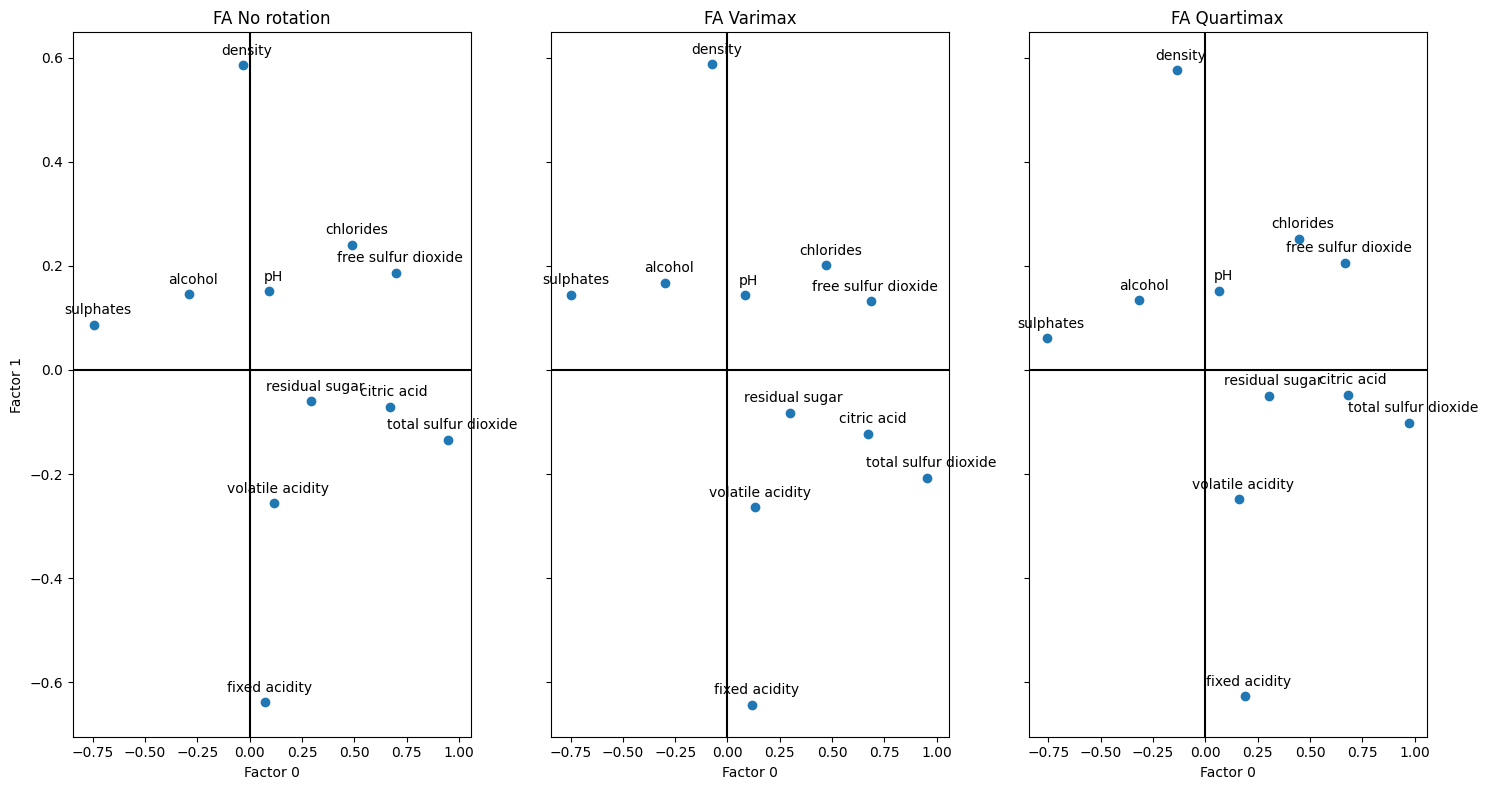

In [93]:
methods = [
    ("FA No rotation", FactorAnalyzer(2)),
    ("FA Varimax", FactorAnalyzer(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalyzer(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)

for ax, (method_name, fa) in zip(axes, methods):
    fa.fit(X)

    loadings = fa.loadings_


    ax.scatter(loadings[:, 0], loadings[:, 1])
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.text(x + 0.02, y + 0.02, data_white.columns[i], ha="center")

    ax.set_title(method_name)


    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 0")


plt.tight_layout()
plt.show()